In [114]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate as integrate
from scipy.interpolate import interp1d

In [154]:
from scipy.interpolate import splev
from scipy import interpolate

In [155]:
r, c, rho, p, G1, T = np.loadtxt('solar_model.txt',unpack=True)

In [156]:
C   = np.poly1d(np.polyfit(r,c,20))
#RHO = np.poly1d(np.polyfit(r,rho,100))
P = np.poly1d(np.polyfit(r,p,13))

In [217]:
RHO = interp1d(r, rho,kind='cubic')
C = interp1d(r,c,kind='cubic')
rr = np.linspace(0,1,100)

RHO2 = np.poly1d(np.polyfit(rr,RHO(rr),100))
#plt.plot(rr,C(rr))
#plt.ylim(-0.1,0.1)

### Frequencies

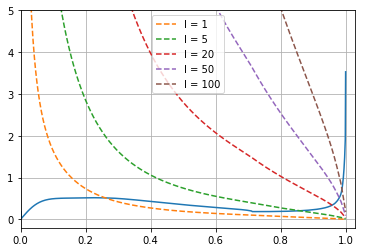

In [292]:
rr = np.linspace(0,1,1000)
dd = np.diff(rho)/np.diff(r)
dd = list(dd)
dd.append(1)
dd = np.array(dd)
RHOp = interp1d(r, dd,kind='cubic')



wc = -C(rr)*RHOp(rr)/(2*RHO(rr)*R)
def S(l,rr):
    return np.sqrt(l*(l+1))*C(rr)/(R*rr)

plt.plot(rr,wc*1000/(2*np.pi))
for i in [1,5,20,50,100]:
    plt.plot(rr,S(i,rr)*1000/(2*np.pi),'--',label='l = '+str(i))
plt.ylim(-0.2,5)
plt.xlim(0,1.03)
plt.grid(loc='')
plt.legend()
plt.savefig('Frequencies.pdf')

In [219]:
import warnings
warnings.filterwarnings("ignore")

### Ray-Path Approximation

In [288]:
def calc(r,w=2*np.pi*6000e-6,l=100):
    
    def Delta(r,w,l):
        R = 6.9551e10
        L = np.sqrt(l*(l+1))
        #val = r*w/(L*C(r))
        #dydt = 2/(r*np.sqrt((R*val)**2-1))
        dydt = 2*C(r)/(r**2*R*np.sqrt((w/L)**2-(C(r)/(r*R))**2))
        #dydt = 2*L/(r**2*R*np.sqrt((w/C(r))**2-(L/r*R)**2))
        return dydt

    def Tau(r,w,l):
        R = 6.9551e10
        L = np.sqrt(l*(l+1))
        wc = -C(r)*RHOp(r)/(2*RHO(r)*R)
        #val = L*C(r)/(r*R*w)
        #dydt = 2*R/(C(r)*np.sqrt(1-val**2))
        #dydt = R/(C(r)*np.sqrt(1-(L*C(r)/(R*r*w))**2))
        dydt = 2*R/(C(r)*np.sqrt(1- (wc/w)**2 - (L*C(r)/(R*r*w))**2))
        return dydt
    
    res1 = integrate.quad(Delta, r, 1,args=(w,l),full_output=0)
    rad = res1[0]
    res2 = integrate.quad(Tau, r, 1,args=(w,l),full_output=0)
    arc = rad*3600*180/np.pi
    #return arc*695.5/(945.105957), res2[0]
    return 2*rad*695.5, res2[0]

def plot(rmin=0.95,v=6000e-6,l=100,xrange=None,tmin=None,tmax=None):
    w = v*2*np.pi
    r = np.linspace(rmin,1,50)
    t, d = [], []
    for i in r:
        dd, tt = calc(i,w,l)
        t.append(tt)
        d.append(dd)
    plt.plot(np.array(d),np.array(t)+2700,'--')
    if xrange:
        plt.xlim(-0.1,xrange)
        ymin = tmin*60
        ymax = tmax*60
        plt.ylim(ymin,ymax)

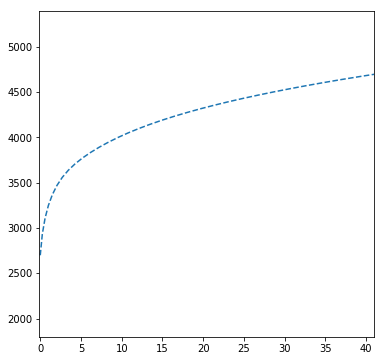

In [289]:
plt.figure(figsize=(6,6))
plot(0.92,v=6e-3,l=140,xrange=41,tmin=30,tmax=90)

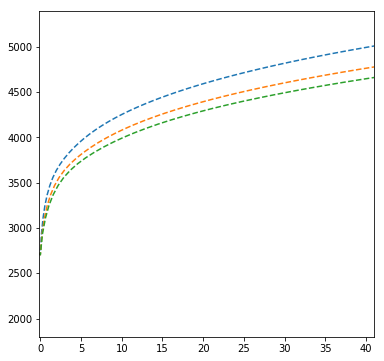

In [290]:
plt.figure(figsize=(6,6))
plot(0.92,v=6e-3,l=80,xrange=41,tmin=30,tmax=90)
plot(0.92,v=6e-3,l=120,xrange=41,tmin=30,tmax=90)
plot(0.92,v=6e-3,l=150,xrange=41,tmin=30,tmax=90)


In [ ]:
def Delta2(r,w=2*np.pi*3000e-6,l=55):
    R = 6.9551e10
    L = np.sqrt(l*(l+1))
    val = r*w/(L*C(r))
    dydt = 1/(r*np.sqrt((R*val)**2-1))
    return dydt

In [ ]:
r = np.linspace(0.9,1,10000)
#stepmin = 0.0778
stepmin = 0.083
theta = integrate.odeint(Delta,stepmin,r)
stepmin2 = 0.078
r2 = np.linspace(0.5,1,10000)
res3 = integrate.odeint(Delta2,stepmin,r2)
#plt.figure(figsize=(10,10))
#for i in range(0,6,1):
    #plt.polar(theta+2*i*theta[-1]-(2*i+1)*stepmin,r,c='b')
    #plt.polar(-theta+2*i*theta[-1]-(2*i-1)*stepmin,r,c='b')
    #plt.polar(res3+2*i*res3[-1]-(2*i+1)*stepmin2,r2,'g-')
    #plt.polar(-res3+2*i*res3[-1]-(2*i-1)*stepmin2,r2,'g-')
#plt.polar(np.linspace(0,2*np.pi,100),0.9*np.ones(100),'r--')
#plt.polar(np.linspace(0,2*np.pi,100),0.5*np.ones(100),'r--')

#plt.savefig('refrac2.pdf')